In [2]:
import json
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt

In [113]:
userInput = input()

aapl


In [114]:
stock = yf.Ticker(userInput)

In [111]:
def get_response(stock_name, ticker_sym):
    
    # EXCEPTION HANDLING - Handle Errors (IE, the stock doesn’t exist and/or the API is not returning information)
    try:
        info = ticker_sym.info
    except:
        print(f"Cannot get information for stock, check spelling or it does not exist")
        continue
    
    # 
    urlQuote = 'https://query1.finance.yahoo.com/v7/finance/quote'
    querystring= {"symbols": userInput}

    header_var ={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    response = requests.request("GET",urlQuote, headers=header_var,params=querystring)
    stock_json = response.json()
    
    # 
    urlQuote2 = "https://query1.finance.yahoo.com/v10/finance/quoteSummary/"
    querystring2 = {"symbol": userInput, "modules":"defaultKeyStatistics"}

    response2 = requests.request("GET",urlQuote2, headers=header_var,params=querystring2)
    stock_json2 = response2.json()

    # 
    urlQuote3 = "https://query1.finance.yahoo.com/v10/finance/quoteSummary/"
    querystring3 = {"symbol": userInput, "modules":"financialData"}

    response3 = requests.request("GET",urlQuote3, headers=header_var,params=querystring3)
    stock_json3 = response3.json()


    print("\n Ticker Name: " + userInput, 
          "\n Full Name: " + stock_json['quoteResponse']['result'][0]['longName'], 
         "\n Current Price: " + stock_json3['quoteSummary']['result'][0]['financialData']['currentPrice']['fmt']
, 
         "\n Target Mean Price: " + stock_json3['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt']
,
         "\n Cash on Hand: " + stock_json3['quoteSummary']['result'][0]['financialData']['totalCash']['fmt']
,
         "\n Profit Margins: " + stock_json2['quoteSummary']['result'][0]['defaultKeyStatistics']['profitMargins']['fmt']
)
    
    #Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days.
    hist = ticker_sym.history(pe
                              iod="5d")
    hist["Close"].plot()
    
    
    
    
    
    


 Ticker Name: aapl 
 Full Name: Apple Inc. 
 Current Price: 138.38 
 Target Mean Price: 183.16 
 Cash on Hand: 48.23B 
 Profit Margins: 25.71%


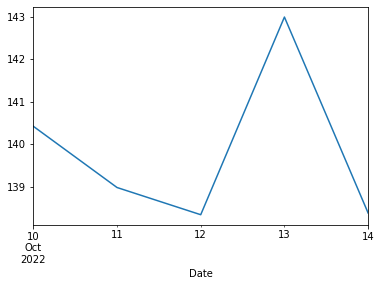

In [112]:
get_response(userInput, stock)